# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Loading-.mat-files:-A-simple-dataset" data-toc-modified-id="Loading-.mat-files:-A-simple-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading .mat files: A simple dataset</a></div><div class="lev1 toc-item"><a href="#Our-beloved-Iris-Dataset" data-toc-modified-id="Our-beloved-Iris-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Our beloved Iris Dataset</a></div><div class="lev2 toc-item"><a href="#Visualizations" data-toc-modified-id="Visualizations-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizations</a></div><div class="lev3 toc-item"><a href="#How-much-variance-is-explained-by-each-component?" data-toc-modified-id="How-much-variance-is-explained-by-each-component?-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>How much variance is explained by each component?</a></div><div class="lev2 toc-item"><a href="#Lets-fit-a-model" data-toc-modified-id="Lets-fit-a-model-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Lets fit a model</a></div><div class="lev3 toc-item"><a href="#The-wrong-way" data-toc-modified-id="The-wrong-way-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>The wrong way</a></div><div class="lev3 toc-item"><a href="#The-right-way" data-toc-modified-id="The-right-way-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>The right way</a></div><div class="lev1 toc-item"><a href="#Digits-dataset" data-toc-modified-id="Digits-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Digits dataset</a></div><div class="lev2 toc-item"><a href="#Load-dataset" data-toc-modified-id="Load-dataset-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load dataset</a></div><div class="lev2 toc-item"><a href="#Separate-train-and-test" data-toc-modified-id="Separate-train-and-test-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Separate train and test</a></div><div class="lev2 toc-item"><a href="#Fit,-predict,-score" data-toc-modified-id="Fit,-predict,-score-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fit, predict, score</a></div><div class="lev3 toc-item"><a href="#The-hard-way" data-toc-modified-id="The-hard-way-431"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>The hard way</a></div><div class="lev3 toc-item"><a href="#The-easy-way" data-toc-modified-id="The-easy-way-432"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>The easy way</a></div><div class="lev4 toc-item"><a href="#Can't-we-have-both?" data-toc-modified-id="Can't-we-have-both?-4321"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>Can't we have both?</a></div><div class="lev3 toc-item"><a href="#Continuous-measure-(optional)" data-toc-modified-id="Continuous-measure-(optional)-433"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Continuous measure (optional)</a></div><div class="lev2 toc-item"><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Hyperparameter tuning</a></div><div class="lev1 toc-item"><a href="#EEG-dataset" data-toc-modified-id="EEG-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EEG dataset</a></div><div class="lev2 toc-item"><a href="#Dataset-characterization" data-toc-modified-id="Dataset-characterization-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dataset characterization</a></div><div class="lev3 toc-item"><a href="#Remove-unnecessary-columns" data-toc-modified-id="Remove-unnecessary-columns-511"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Remove unnecessary columns</a></div><div class="lev3 toc-item"><a href="#The-dataset-is-balanced?" data-toc-modified-id="The-dataset-is-balanced?-512"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>The dataset is balanced?</a></div><div class="lev2 toc-item"><a href="#Decoding" data-toc-modified-id="Decoding-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decoding</a></div><div class="lev3 toc-item"><a href="#Organize-into-features-and-target" data-toc-modified-id="Organize-into-features-and-target-521"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Organize into features and target</a></div><div class="lev4 toc-item"><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5211"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Logistic Regression</a></div><div class="lev4 toc-item"><a href="#SVM" data-toc-modified-id="SVM-5212"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>SVM</a></div><div class="lev2 toc-item"><a href="#Bayesian-Hyperparameter-Optimization" data-toc-modified-id="Bayesian-Hyperparameter-Optimization-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bayesian Hyperparameter Optimization</a></div><div class="lev2 toc-item"><a href="#Covariance-estimation" data-toc-modified-id="Covariance-estimation-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Covariance estimation</a></div><div class="lev2 toc-item"><a href="#Clustering" data-toc-modified-id="Clustering-55"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Clustering</a></div><div class="lev2 toc-item"><a href="#ERP" data-toc-modified-id="ERP-56"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>ERP</a></div>

# Imports 

Library imports generally come in the beginning of the code. In this notebook we let them close to when they are first needed for didatic purposes.

In [1]:
# Always good to have those
# For dealing with matlab-style arrays, we use numpy
import numpy as np  
# For a stronger data structure, pandas
import pandas as pd 

# Loading .mat files: A simple dataset

In [2]:
# Load .mat file
from scipy.io import loadmat

## File is originally a dictionary
data_dict = loadmat('one_to_ten.mat')
print('Data type:\n', type(data_dict))
print('------------------------------')
print('Data:\n', data_dict)
print('------------------------------')
print('Datakeys:\n', data_dict.keys() )

Data type:
 <class 'dict'>
------------------------------
Data:
 {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Mar 19 18:19:15 2018', '__version__': '1.0', '__globals__': [], 'one2ten': array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])}
------------------------------
Datakeys:
 dict_keys(['__header__', '__version__', '__globals__', 'one2ten'])


In [3]:
## We have to index by the variable name
var_name = 'one2ten'
data = data_dict[var_name]
print(data)

[[ 1  2  3  4  5  6  7  8  9 10]]


# Our beloved Iris Dataset 

In [4]:
## Now to a more interesting (or not) dataset
data = loadmat('iris_dataset.mat')
X, y, names = data['X'], data['y'], data['feat_names']

print('X: ', type(X), X.shape)
print('y: ', type(y), y.shape)
print('names: ', type(names), names.shape)

X:  <class 'numpy.ndarray'> (150, 4)
y:  <class 'numpy.ndarray'> (150, 1)
names:  <class 'numpy.ndarray'> (4,)


In [5]:
df = pd.DataFrame(X, columns = names)
df['target'] = y # you can always add an extra column, if you give a vector of correct size

# Print a random sample of rows
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,1
10,5.4,3.7,1.5,0.2,0
125,7.2,3.2,6.0,1.8,2
73,6.1,2.8,4.7,1.2,1
43,5.0,3.5,1.6,0.6,0


## Visualizations 

In [6]:
# Visualize distribution
## Matplotlib is the default and most widely used python plotting tool
## It is very complete but is somewhat low-level
import matplotlib.pyplot as plt
## Seaborn gives higher-level interaction with an underlying matplotlib
import seaborn as sns
%matplotlib inline

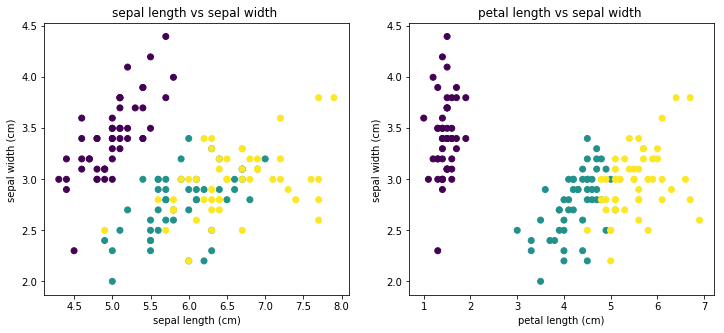

In [7]:
### Function to remove ending of names
### NOT IMPORTANT at this point, only aesthetic
mid = lambda s: s[:-5]

## We could visualize using matplotlib
### Plot the first versus second features, with color corresponding to label
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y.ravel())
plt.xlabel(names[0]); plt.ylabel(names[1])
plt.title('%s vs %s'%(mid(names[0]), mid(names[1])))

plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,1], c=y.ravel())
plt.xlabel(names[2]); plt.ylabel(names[1])
plt.title('{} vs {}'.format(mid(names[2]), mid(names[1])));

plt.show()

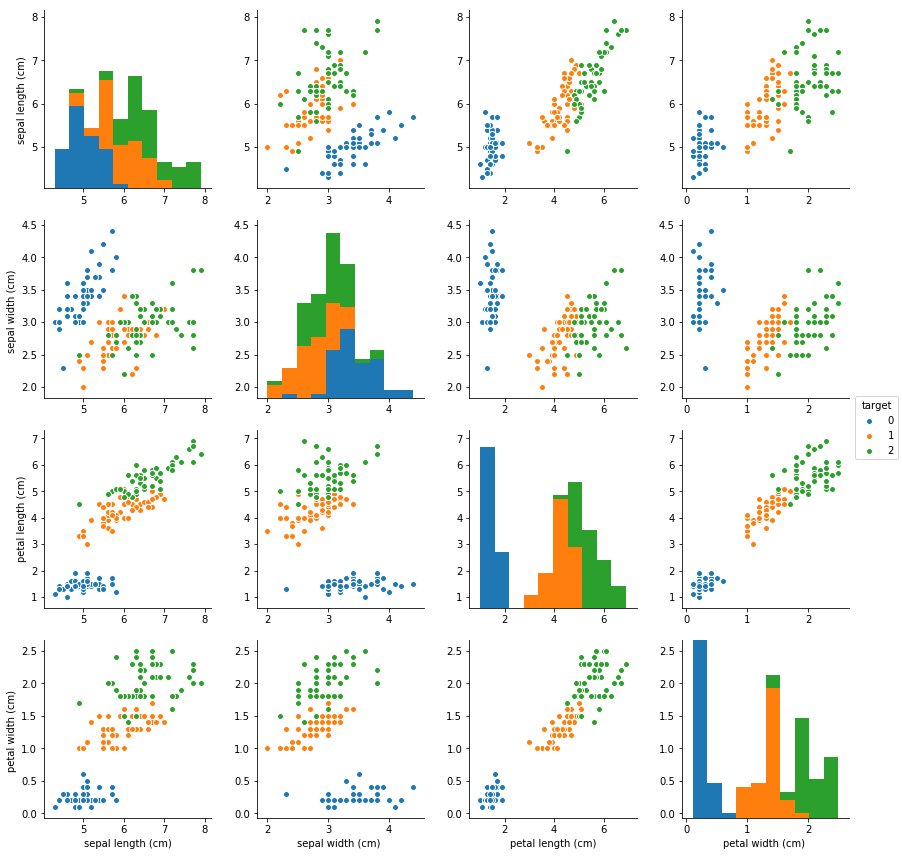

In [8]:
## Using seaborn is easier
sns.pairplot(vars=data['feat_names'], data=df, hue="target", size=3)
#plt.show()

In [9]:
# Still, we want to visualize the distribution, in only two dimensions

## Lets PCA
from sklearn.decomposition import PCA

### PCA is not a function, is a class, but you will get used to it
### This means it has to be initialized by itself, in despite of the dataset
pca = PCA()
### The dataset has to be organized with one observation per row
### and one feature per columns, i.e. (n_observations, n_features)
pca.fit(X)
### The fit method is used by all sklearn models
### Some of then have also the 'predict' method, and some have 'transform'
Xpc = pca.transform(X)
print('Returned dataset format: ', Xpc.shape)

Returned dataset format:  (150, 4)


In [10]:
### The returned features are the data projected into the principal components,
### and not the original features
print(X.sum(axis=0) == Xpc.sum(axis=0))

[False False False False]


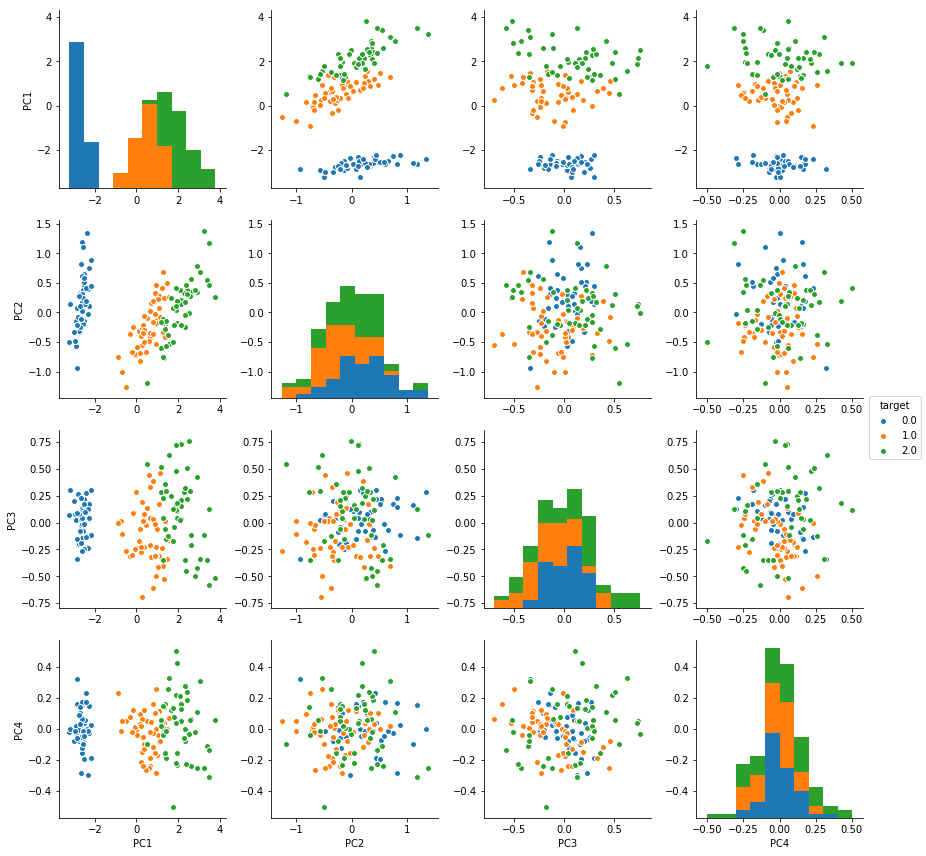

In [11]:
### Is the dataset still the same? lets pairplot
pc_df = pd.DataFrame(np.hstack((Xpc, y)), columns=['PC1', 'PC2', 'PC3', 'PC4', 'target'])
sns.pairplot(vars=pc_df.columns[:-1], data=pc_df, hue="target", size=3)
#plt.show()

### How much variance is explained by each component?

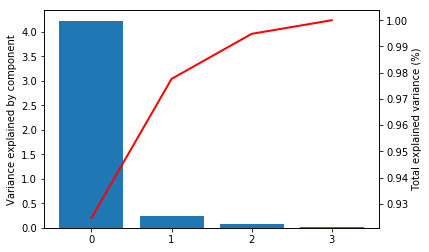

In [12]:
plt.bar([0,1,2,3], pca.explained_variance_, .8); plt.ylabel('Variance explained by component')
# We will mirror the plot through the x-axis
plt.twinx()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='r', linewidth=2); plt.ylabel('Total explained variance (%)')
plt.xticks([0,1,2,3]);

## Lets fit a model 

### The wrong way

/home/tevo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


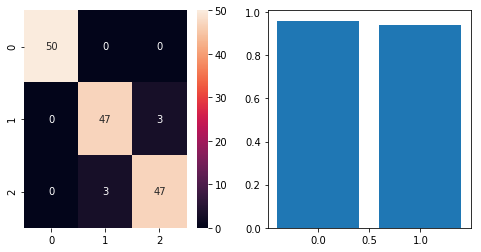

In [13]:
# Lets then predict the classes from the data
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Choose a model (1 line)
clf = GaussianNB()

## Fit the model (1 line) (now we will do the wrong way - no splitting)
clf.fit(X, y)

## Predict (1 line)
y_pred = clf.predict(X)

## Look at results
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y,y_pred), cohen_kappa_score(y, y_pred)]
plt.bar(widths, heights);

This is not right. The model is very probably overfitting, as we used the same data for training and evaluation. We must separate the data into training and testing.

### The right way

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90, 1) (60, 1)


/home/tevo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


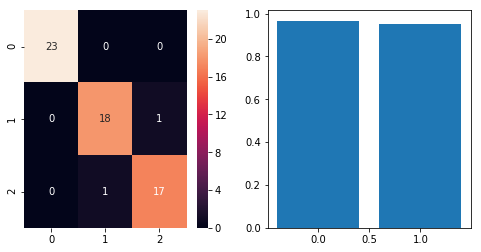

In [16]:
clf = GaussianNB()
## Use the same model for comparison.
## Fit the model (1 line) (now we will do the right way
clf.fit(X_train, y_train)

## Predict (1 line) - Use now the test set
y_pred = clf.predict(X_test)

## Look at results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y_test, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y_test,y_pred), cohen_kappa_score(y_test, y_pred)]
plt.bar(widths, heights);

Unfortunately for didatic purposes, the iris dataset is so easy to do classification, that the scores do not change a lot when separating a fold for testing. In harder classification tasks, this is not so.

# Digits dataset

## Load dataset

In [17]:
from sklearn import datasets
digits = datasets.load_digits()
X, y, classes = digits.data, digits.target, digits.target_names
print(X.shape, y.shape, classes.shape)

(1797, 64) (1797,) (10,)


## Separate train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 64) (719, 64) (1078,) (719,)


## Fit, predict, score

### The hard way

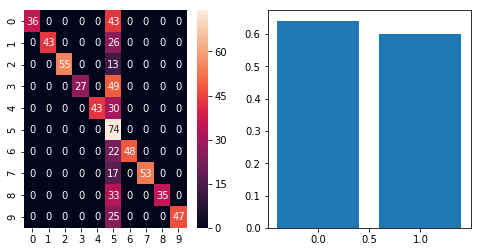

In [19]:
clf = SVC(probability=True)

## Fit the model
clf.fit(X_train, y_train)

## Predict 
y_pred = clf.predict(X_test)

## Look at results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y_test, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y_test,y_pred), cohen_kappa_score(y_test, y_pred)]
plt.bar(widths, heights);

### The easy way
With cross_val_score, we only have access to the final score of each fold

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.metrics import make_scorer
score_func = make_scorer(cohen_kappa_score)
scores_default = cross_val_score(clf, X, y, cv=5)
scores_kappa = cross_val_score(clf, X, y, cv=5, scoring = score_func)

In [22]:
scores = pd.DataFrame({'default':scores_default, 'kappa': scores_kappa, 'cv':np.arange(5)})
scores.sample(5)

,cv,default,kappa
4,4,0.498592,0.442287
2,2,0.415042,0.349851
1,1,0.408840,0.342059
3,3,0.487395,0.430056
0,0,0.434066,0.370306


In [23]:
# We will melt the dataframe to 'tidy' format, which seaborn generally uses
scores.melt(id_vars='cv',var_name='score').sample(5)

,cv,score,value
2,2,default,0.415042
9,4,kappa,0.442287
1,1,default,0.408840
7,2,kappa,0.349851
4,4,default,0.498592


(0, 1)

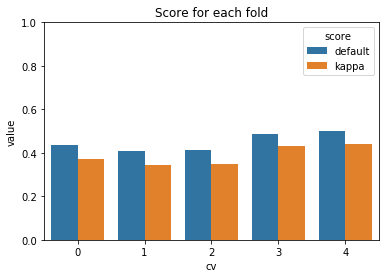

In [24]:
sns.barplot(x='cv', y='value',hue='score', data=scores.melt(id_vars='cv',var_name='score'))
# Seaborn uses matplotlib under the hood. We use plt to change style
plt.title('Score for each fold'); plt.ylim(0,1)

#### Can't we have both?

In [25]:
from sklearn.model_selection import cross_val_predict

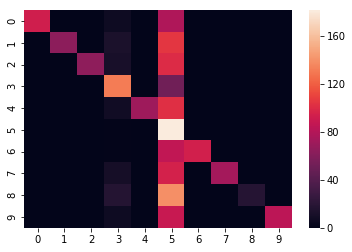

In [26]:
y_pred = cross_val_predict(clf, X, y, cv=10)
sns.heatmap( confusion_matrix(y, y_pred))

### Continuous measure (optional)

In [27]:
clf.fit(X_train, y_train)
# We will use the predicted probability for each class, instead of the final classification
probas = clf.predict_proba(X_test)
# The size of output will be (n_samples, n_classes)
print(probas.shape)

(719, 10)


In [28]:
# Lets facilitate analysis using dataframes
probas = pd.DataFrame(probas, columns= classes)
probas['true_label'] = y_test

In [29]:
probas.head()

,0,1,2,3,4,5,6,7,8,9,true_label
0,0.031944,0.078392,0.115970,0.107973,0.091072,0.148326,0.065996,0.116774,0.130285,0.113267,5
1,0.034888,0.080955,0.118587,0.109744,0.094756,0.120330,0.068150,0.117942,0.138146,0.116503,2
2,0.035023,0.081257,0.117526,0.109899,0.094851,0.120396,0.068250,0.118013,0.138187,0.116598,9
3,0.033581,0.080061,0.116843,0.109067,0.093285,0.132139,0.067304,0.117459,0.135073,0.115189,5
4,0.034880,0.080938,0.116292,0.116423,0.094168,0.119752,0.067377,0.116573,0.137630,0.115967,3


In [30]:
mean_proba_per_label = probas.groupby('true_label').mean()
mean_proba_per_label

,0,1,2,3,4,5,6,7,8,9
true_label,,,,,,,,,,
0,0.483915,0.046112,0.060024,0.072131,0.048394,0.059982,0.033422,0.060452,0.075227,0.060343
1,0.025630,0.330680,0.077876,0.089307,0.068903,0.089362,0.045312,0.075824,0.109454,0.087653
2,0.030462,0.068592,0.173438,0.099454,0.088327,0.116165,0.062163,0.113551,0.136133,0.111714
3,0.034075,0.079530,0.110769,0.144683,0.090981,0.117066,0.063830,0.110094,0.135538,0.113432
4,0.028057,0.068857,0.104433,0.096783,0.232348,0.102803,0.057566,0.105085,0.105991,0.098076
5,0.032317,0.077161,0.115286,0.107028,0.089496,0.158554,0.065147,0.116333,0.127062,0.111615
6,0.020686,0.046864,0.079849,0.071062,0.062235,0.084331,0.376511,0.083197,0.091189,0.084076
7,0.030137,0.066835,0.111164,0.095416,0.086752,0.116068,0.061735,0.187543,0.135111,0.109238
8,0.033761,0.079805,0.117206,0.108707,0.088869,0.114414,0.065812,0.117674,0.161453,0.112300


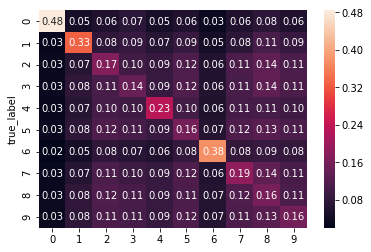

In [31]:
sns.heatmap( probas.groupby('true_label').mean(), annot=True, fmt='.2f')

In [32]:
probas['pred_label'] = probas.drop('true_label',axis=1).idxmax(axis=1)

probas['proba_of_predicted'] = probas.apply(lambda x: x[x.pred_label.astype(int)], axis=1)

errors = probas[ probas.true_label != probas.pred_label ].sort_values('proba_of_predicted')

less_certain = errors.index[0]
more_certain = errors.index[-1]

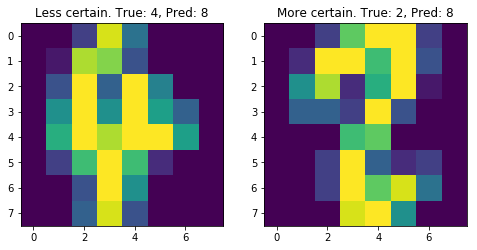

In [33]:
plt.figure(figsize=(8,10))

plt.subplot(1,2,1)
plt.imshow(X_test[less_certain,:].reshape(8,8))
plt.title('Less certain. True: %d, Pred: %d'%tuple(probas.loc[less_certain][['true_label','pred_label']]))

plt.subplot(1,2,2)
plt.imshow(X_test[more_certain,:].reshape(8,8))
plt.title('More certain. True: %d, Pred: %d'%tuple(probas.loc[more_certain][['true_label','pred_label']]));

## Hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
clf = SVC()

param_dict = {'C' : np.logspace(-2, 2, 5), 
              'gamma' : np.logspace(-7, 1, 5) }

grid = GridSearchCV(clf, param_dict, scoring = score_func, cv=3)

In [36]:
%%time # Measures time to run full cell
grid.fit(X, y);

CPU times: user 36.7 s, sys: 0 ns, total: 36.7 s
Wall time: 36.7 s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'gamma': array([  1.00000e-07,   1.00000e-05,   1.00000e-03,   1.00000e-01,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(cohen_kappa_score), verbose=0)

In [37]:
print( grid.best_params_ )

{'C': 10.0, 'gamma': 0.001}


In [38]:
best = grid.best_estimator_

In [39]:
grid.best_score_

0.97341190304539882

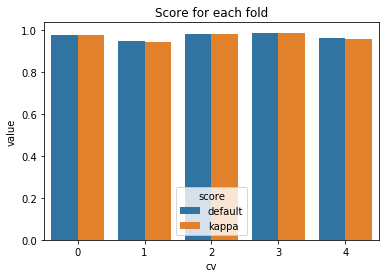

In [40]:
scores_default = cross_val_score(best, X, y, cv=5)
scores_kappa = cross_val_score(best, X, y, cv=5, scoring = score_func)
scores = pd.DataFrame({'default':scores_default, 'kappa': scores_kappa, 'cv':np.arange(5)})
sns.barplot(x='cv', y='value',hue='score', data=scores.melt(id_vars='cv',var_name='score'))
plt.title('Score for each fold');

# EEG dataset

In [47]:
data = pd.read_csv('Subject18_ConditionAt_L.csv', index_col=0)
data.sample(5)

/home/tevo/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,y,subject,condition,t,trial,ch,value
4232019,1.0,18,At_L,0.036,239.0,Ch44,-7.465965
3409981,2.0,18,At_L,0.260,665.0,Ch37,2.212146
6010178,1.0,18,At_L,0.324,254.0,Ch59,-8.343064
5292628,1.0,18,At_L,-0.064,188.0,Ch53,-1.073404
3687349,1.0,18,At_L,0.008,17.0,Ch4,-6.772370


## Dataset characterization

In [48]:
print('Columns: %s'%data.columns)
print('Shape: ', data.shape)
print('Classes: ', data.y.unique())

Columns: Index(['y', 'subject', 'condition', 't', 'trial', 'ch', 'value'], dtype='object')
Shape:  (6580436, 7)
Classes:  [ 1.  2.]


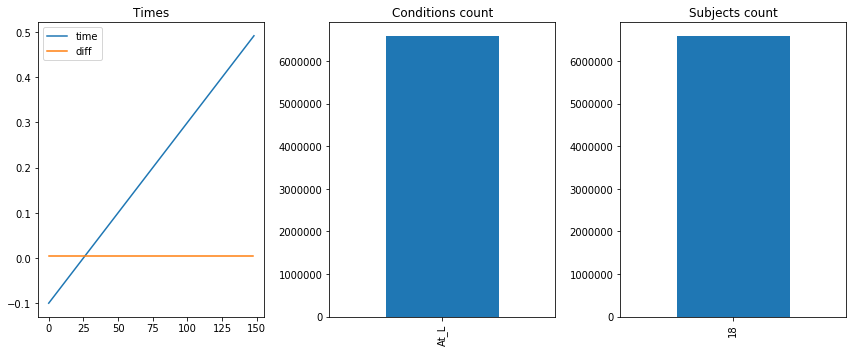

In [49]:
fig, axs = plt.subplots(1,3, figsize=(12,5))
times = data.t.unique()

plt.sca(axs[0]) # Sets current axis. The same as subplot(1,2,1)
plt.plot(times, label='time')
plt.plot(np.diff(times),label= 'diff')
plt.legend(); plt.title('Times')

plt.sca(axs[1]) # Sets current axis. The same as subplot(1,2,2)
data.condition.value_counts().plot.bar(); plt.title('Conditions count')
plt.tight_layout()

plt.sca(axs[2]) 
data.subject.value_counts().plot.bar(); plt.title('Subjects count')
plt.tight_layout()

### Remove unnecessary columns

In [50]:
data = data.drop(['subject', 'condition'], axis=1)

### The dataset is balanced?

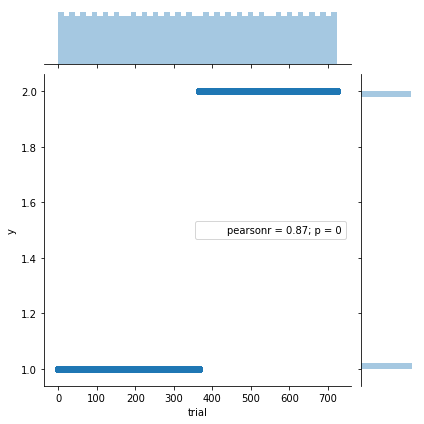

In [51]:
sns.jointplot('trial','y', data)

In [52]:
data.groupby('y').apply(lambda x: x.trial.unique().shape[0])

y
1.0    366
2.0    358
dtype: int64

There are more trials of type 1 than of type 2, and there is one label per trial. At first we will leave it like that, since the difference is small.

## Decoding

### Organize into features and target

In [54]:
feature_df = data.set_index(['y','t','trial','ch']).unstack(['ch']).reset_index('y')
feature_df.sample(5)

y     value                                            \
ch                      Ch0        Ch1       Ch10      Ch11      Ch12   
t      trial                                                            
-0.084 710.0  2.0  2.062561  -8.138501  -4.925695  1.261124  1.203157   
 0.476 296.0  1.0 -6.399298 -10.184963  -1.521746 -6.063494  1.170651   
 0.204 591.0  2.0  4.043483   3.266184  -1.970338 -4.457012  0.268596   
 0.256 75.0   1.0  4.709332  -4.593356  -6.439521 -6.196412  3.585800   
 0.348 557.0  2.0  7.644548  12.112788  10.791469 -8.016868 -6.838213   

                                                          ...               \
ch                Ch13      Ch14       Ch15       Ch16    ...         Ch55   
t      trial                                              ...                
-0.084 710.0 -6.086973 -2.841953  -0.850421   1.863226    ...     2.514447   
 0.476 296.0  4.086882  1.481281  -3.919495   1.057701    ...     5.105243   
 0.204 591.0  5.783930  1.923468  -7.065387   0.035252    ...    -3.643887   
 0.256 75.0   3.545048 -2.051926 -10.216817   3.545781    ...    -0.628819   
 0.348 557.0  3.015926  4.704879   6.376576 -10.915423    ...    -0.271299   

                                                                           \
ch                Ch56      Ch57      Ch58      Ch59        Ch6      Ch60   
t      trial                                                                
-0.084 710.0  4.536888  4.902300  5.641286  4.709980  -4.084623  2.987703   
 0.476 296.0 -0.585324  4.173226  6.031898  4.760465  -1.707494  7.194451   
 0.204 591.0 -4.438168 -2.225456 -0.578517 -1.806496  -3.824995 -5.269300   
 0.256 75.0  -1.648311 -1.020874 -2.128472 -0.886842  -7.024707 -4.539339   
 0.348 557.0 -7.544325 -2.276657 -5.741064 -3.316789  21.810764 -3.080420   

                                            
ch                 Ch7       Ch8       Ch9  
t      trial                                
-0.084 710.0  3.622852 -0.545363 -3.135493  
 0.476 296.0  0.559893  0.537908  1.297601  
 0.204 591.0 -3.082735  7.319626  8.942326  
 0.256 75.0   4.061601  4.437291  4.179282  
 0.348 557.0 -9.203894 -2.796456  4.520824  

[5 rows x 62 columns]

We will select data for a single time point

In [118]:
feature_df.loc[times[0]].head()
X = feature_df.loc[times[0]].drop('y', axis=1).values
y = feature_df.loc[times[0]].y

/home/tevo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  


#### Logistic Regression

In [67]:
clf_lr = LogisticRegression()
clf_sv = SVC()

In [73]:
%time lr_score = cross_val_score(clf_lr, X, y, cv=10)
print('Logistic Regression scores: ', lr_score)

CPU times: user 120 ms, sys: 4 ms, total: 124 ms
Wall time: 128 ms
Logistic Regression scores:  [ 0.4109589   0.49315068  0.47945205  0.49315068  0.45205479  0.45205479
  0.44444444  0.43055556  0.52112676  0.50704225]


#### SVM

In [77]:
%time sv_score = cross_val_score(clf_sv, X, y, cv=10)
print('SVM scores: ', sv_score)

CPU times: user 576 ms, sys: 0 ns, total: 576 ms
Wall time: 577 ms
SVM scores:  [ 0.52054795  0.46575342  0.47945205  0.52054795  0.57534247  0.45205479
  0.45833333  0.52777778  0.53521127  0.50704225]


As the dataset gets bigger, it is important to optimize the hyperparameter tuning

## Bayesian Hyperparameter Optimization

In [119]:
from skopt import gp_minimize

# To use skopt, the interface is a little different
# Instead of the param. values per se, we give intervals
space = [(10., 1e7, "log-uniform"),       # C
         (1e-10, 1e-1, "log-uniform")]   # gamma
names = ['C','gamma']

clf = SVC

# We also have to provide a function to minimize
def objective(params):
        parameters = dict(zip(names,params))
        score = -1*np.mean(cross_val_score( clf(**parameters), X, y, cv=10) )
        return score
    
# Then at last we can call the optimization function
verbose = 0 # The higher the number, the more outputs it gives while searching
res = gp_minimize(objective, space ,n_calls=20,n_random_starts=10, n_jobs=-1,verbose=verbose)

/home/tevo/anaconda3/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:366: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [121]:
from skopt.plots import plot_objective

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0364d74278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0364c98a90>]], dtype=object)

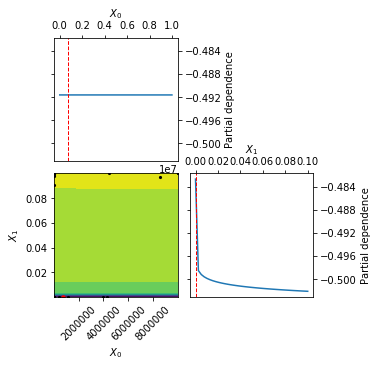

In [122]:
plot_objective(res)

In [ ]:
scores = []
clf = LogisticRegression()
for t in times:
    scores.append(cross_val_score(clf, X, y, cv=6)

## Covariance estimation

In [83]:
from sklearn.covariance import OAS, EmpiricalCovariance, LedoitWolf

/home/tevo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  """
/home/tevo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/home/tevo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Text(0.5,1,'OAS')

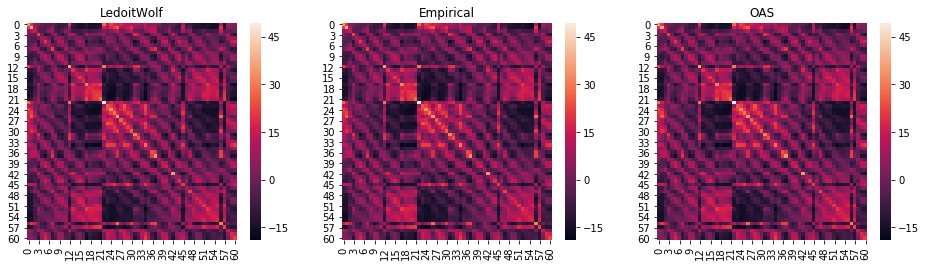

In [84]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
cov = LedoitWolf()
cov.fit(feature_df.drop('y', axis=1))
sns.heatmap(cov.covariance_)
plt.title('LedoitWolf')

plt.subplot(1,3,2)
cov = EmpiricalCovariance()
cov.fit(feature_df.drop('y', axis=1))
sns.heatmap(cov.covariance_)
plt.title('Empirical')

plt.subplot(1,3,3)
cov = OAS()
cov.fit(feature_df.drop('y', axis=1))
sns.heatmap(cov.covariance_)
plt.title('OAS')

In [85]:
X = cov.covariance_

## Clustering

In [92]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores=[]
n_clus = np.arange(2,20)
for Ngaussians in n_clus:
    clf = GaussianMixture(n_components=Ngaussians)
    clf.fit(X)

    preds = clf.predict(X)

    score = silhouette_score(X, preds)
    print ('For ' +str(Ngaussians) +' gaussians, ' +str(score) + ' score')
    scores.append(score)
    


bestN = n_clus[np.argmax(scores)]
clf = GaussianMixture(n_components=bestN)
clf.fit(X)
preds = clf.predict(X)
score = silhouette_score(X, preds)
print ('Using model with ' +str(bestN)+ ' clusters and best score of ' + str(score))

For 2 gaussians, 0.387632109506 score
For 3 gaussians, 0.355464865643 score
For 4 gaussians, 0.304454247218 score
For 5 gaussians, 0.343442339522 score
For 6 gaussians, 0.346616311176 score
For 7 gaussians, 0.280186954856 score
For 8 gaussians, 0.271722633745 score
For 9 gaussians, 0.314331987854 score
For 10 gaussians, 0.210090077899 score
For 11 gaussians, 0.258072446075 score
For 12 gaussians, 0.248704322829 score
For 13 gaussians, 0.227588578913 score
For 14 gaussians, 0.215782931492 score
For 15 gaussians, 0.250602526028 score
For 16 gaussians, 0.240985259331 score
For 17 gaussians, 0.242294427613 score
For 18 gaussians, 0.235260867359 score
For 19 gaussians, 0.250637145769 score
Using model with 2 clusters and best score of 0.397532604408


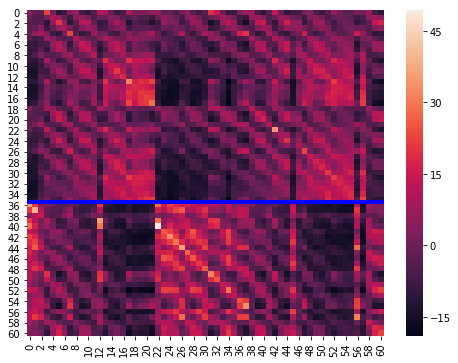

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(np.vstack( (X[preds.astype(bool)],
                        X[preds.astype(bool)==False])))
plt.hlines(preds.sum(),0,61, 'b', linewidth=4)

## ERP

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


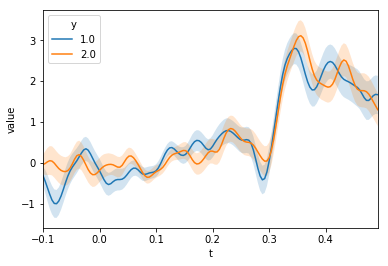

In [74]:
sns.tsplot(data.groupby('ch').get_group('Ch1'), 't', 'trial', 'y', 'value')